In [15]:
import os
import cv2

# --- 1. Define your classes ---
# This is our final list of 8 gestures.
GESTURE_CLASSES = [
    "Peace",
    "RockOn",
    "Hello",
    "Fist",
    "Palm",
    "ThumbsUp",
    "ThumbsDown",
    "None"
]

# --- 2. Define the main paths ---
DATA_PATH = "gesture_data"
TRAIN_PATH = os.path.join(DATA_PATH, "train")
VAL_PATH = os.path.join(DATA_PATH, "val")

# --- 3. Create all the directories ---
def create_dir_structure(base_path, classes):
    """Creates the 'train' and 'val' subdirectories for each class."""
    if not os.path.exists(base_path):
        os.makedirs(base_path)
        print(f"Created directory: {base_path}")
    
    for gesture_class in classes:
        class_path = os.path.join(base_path, gesture_class)
        if not os.path.exists(class_path):
            os.makedirs(class_path)
            print(f"  - Created subdirectory: {class_path}")

# Create the structure
print("Creating training directories...")
create_dir_structure(TRAIN_PATH, GESTURE_CLASSES)

print("\nCreating validation directories...")
create_dir_structure(VAL_PATH, GESTURE_CLASSES)

print("\n--- Directory structure created successfully! ---")

# --- 4. (Optional) Check your webcam ---
# This simple check ensures OpenCV can access your camera.
# You should see a window pop up with your webcam feed.
print("\nChecking webcam... Press 'q' in the popup window to quit.")
cap = cv2.VideoCapture(0) # 0 is usually the default webcam

if not cap.isOpened():
    print("Error: Could not open webcam. Please check your camera permissions.")
else:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Can't receive frame (stream end?). Exiting ...")
            break
        
        # Display the resulting frame
        cv2.imshow('Webcam Check - Press "q" to close', frame)
        
        # Wait for 'q' key to be pressed
        if cv2.waitKey(1) == ord('q'):
            break

# Release the capture and destroy all windows
cap.release()
cv2.destroyAllWindows()
print("Webcam check complete.")

Creating training directories...
  - Created subdirectory: gesture_data\train\Hello

Creating validation directories...
  - Created subdirectory: gesture_data\val\Hello

--- Directory structure created successfully! ---

Checking webcam... Press 'q' in the popup window to quit.
Webcam check complete.


In [16]:
# import cv2
# import os
# import time

# # --- 1. Define Paths and Classes (from Step 1) ---
# DATA_PATH = "gesture_data"
# TRAIN_PATH = os.path.join(DATA_PATH, "train")
# GESTURE_CLASSES = [
#     "Peace", "RockOn", "Hello", "Fist", "Palm", 
#     "ThumbsUp", "ThumbsDown", "None"
# ]

# # --- 2. Define Key Mappings ---
# # Assign a unique key to each gesture class.
# # You can change these keys if you want.
# KEY_MAPPINGS = {
#     'p': "Peace",
#     'r': "RockOn",
#     'h': "Hello",
#     'f': "Fist",
#     'a': "Palm",       # 'a' for pAlm, since 'p' is taken
#     'u': "ThumbsUp",
#     'd': "ThumbsDown",
#     'n': "None"
# }

# # Invert map for easier lookup
# MAPPING_TO_KEY = {v: k for k, v in KEY_MAPPINGS.items()}

# # --- 3. Define Region of Interest (ROI) ---
# # This is the box where you'll place your hand
# # Format: (top, left, bottom, right)
# ROI_RECT = (100, 300, 400, 600) # y1, x1, y2, x2

# # --- 4. The Collection Script ---

# # Get a list of counts for each directory to avoid overwriting
# print("Loading image counts...")
# img_counts = {g: len(os.listdir(os.path.join(TRAIN_PATH, g))) 
#               for g in GESTURE_CLASSES}
# print(f"Current counts: {img_counts}")


# print("\n--- Starting Data Collection ---")
# print("Press the key for the gesture you are making.")
# print("Press 'q' to quit.")

# cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#     print("Error: Could not open webcam.")
#     # Stop here if the camera failed
#     exit()

# while True:
#     ret, frame = cap.read()
#     if not ret:
#         print("Error: Can't receive frame. Exiting...")
#         break
        
#     # Flip the frame horizontally (mirror view)
#     frame = cv2.flip(frame, 1)
    
#     # Clone the frame for saving
#     save_frame = frame.copy()

#     # Draw the ROI rectangle on the frame
#     y1, x1, y2, x2 = ROI_RECT
#     cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
#     # --- Display Instructions on the screen ---
#     text_y = 30
#     cv2.putText(frame, "Place gesture in green box", (10, text_y), 
#                 cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
#     text_y += 30
#     cv2.putText(frame, "Press 'q' to quit", (10, text_y), 
#                 cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
#     text_y += 30

#     # Display mappings
#     for gesture, key in MAPPING_TO_KEY.items():
#         text = f"'{key}' = {gesture} ({img_counts[gesture]})"
#         cv2.putText(frame, text, (10, text_y), 
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)
#         text_y += 25
    
#     # Show the frame
#     cv2.imshow('Data Collection - Press "q" to quit', frame)
    
#     # Wait for a key press
#     key = cv2.waitKey(1) & 0xFF
    
#     if key == ord('q'):
#         break
    
#     # Check if the pressed key is in our mappings
#     if chr(key) in KEY_MAPPINGS:
#         gesture_name = KEY_MAPPINGS[chr(key)]
#         save_path = os.path.join(TRAIN_PATH, gesture_name)
        
#         # Get the current count and format filename
#         count = img_counts[gesture_name]
#         filename = f"{count:04d}.jpg" # e.g., 0001.jpg, 0002.jpg
#         save_file_path = os.path.join(save_path, filename)
        
#         # Extract the ROI from the *original* frame (not the one with text)
#         roi = save_frame[y1:y2, x1:x2]
        
#         # Save the image
#         cv2.imwrite(save_file_path, roi)
#         print(f"Saved: {save_file_path}")
        
#         # Update the count
#         img_counts[gesture_name] += 1

# # --- 5. Cleanup ---
# print("\n--- Data Collection Finished ---")
# print(f"Final Counts: {img_counts}")
# cap.release()
# cv2.destroyAllWindows()

Loading image counts...
Current counts: {'Peace': 200, 'RockOn': 200, 'Hello': 0, 'Fist': 200, 'Palm': 200, 'ThumbsUp': 200, 'ThumbsDown': 200, 'None': 250}

--- Starting Data Collection ---
Press the key for the gesture you are making.
Press 'q' to quit.

--- Data Collection Finished ---
Final Counts: {'Peace': 200, 'RockOn': 200, 'Hello': 0, 'Fist': 200, 'Palm': 200, 'ThumbsUp': 200, 'ThumbsDown': 200, 'None': 250}


In [17]:
# import os
# import shutil

# # --- 1. Define Paths ---
# DATA_PATH = "gesture_data"
# TRAIN_HELLO_PATH = os.path.join(DATA_PATH, "train", "Hello")
# VAL_HELLO_PATH = os.path.join(DATA_PATH, "val", "Hello")

# # --- 2. Safely Remove 'train/Hello' ---
# if os.path.exists(TRAIN_HELLO_PATH):
#     if len(os.listdir(TRAIN_HELLO_PATH)) == 0:
#         shutil.rmtree(TRAIN_HELLO_PATH)
#         print(f"Removed empty directory: {TRAIN_HELLO_PATH}")
#     else:
#         print(f"Warning: {TRAIN_HELLO_PATH} is not empty. Please check it.")
# else:
#     print(f"Directory not found (already removed?): {TRAIN_HELLO_PATH}")

# # --- 3. Safely Remove 'val/Hello' ---
# if os.path.exists(VAL_HELLO_PATH):
#     shutil.rmtree(VAL_HELLO_PATH)
#     print(f"Removed empty directory: {VAL_HELLO_PATH}")
# else:
#     print(f"Directory not found (already removed?): {VAL_HELLO_PATH}")

# print("\n--- Directory cleanup complete! ---")

Removed empty directory: gesture_data\train\Hello
Removed empty directory: gesture_data\val\Hello

--- Directory cleanup complete! ---


In [18]:
import os
import shutil
import random

# --- 1. Define Paths and Classes ---
DATA_PATH = "gesture_data"
TRAIN_PATH = os.path.join(DATA_PATH, "train")
VAL_PATH = os.path.join(DATA_PATH, "val")

# These are the classes you collected data for
CLASSES_TO_SPLIT = [
    "Peace",
    "RockOn",
    "Fist",
    "Palm",
    "ThumbsUp",
    "ThumbsDown",
    "None"
]

# --- 2. Define Validation Split Percentage ---
VAL_SPLIT_RATIO = 0.20 # 20%

print("--- Starting Validation Split ---")

# --- 3. Loop, Shuffle, and Move Files ---
for gesture_class in CLASSES_TO_SPLIT:
    train_class_dir = os.path.join(TRAIN_PATH, gesture_class)
    val_class_dir = os.path.join(VAL_PATH, gesture_class)
    
    # Get list of all images in the training folder for this class
    all_images = os.listdir(train_class_dir)
    
    # Shuffle the list to get a random selection
    random.shuffle(all_images)
    
    # Calculate how many images to move
    num_to_move = int(len(all_images) * VAL_SPLIT_RATIO)
    
    # Select the images to move
    images_to_move = all_images[:num_to_move]
    
    print(f"\nProcessing class: {gesture_class}")
    print(f"  Total images: {len(all_images)}")
    print(f"  Moving {num_to_move} images to validation...")

    # Move the files
    for img_file in images_to_move:
        src_path = os.path.join(train_class_dir, img_file)
        dest_path = os.path.join(val_class_dir, img_file)
        shutil.move(src_path, dest_path)
        
    print(f"  Done. Remaining train images: {len(os.listdir(train_class_dir))}")

print("\n--- Validation split complete! ---")

--- Starting Validation Split ---

Processing class: Peace
  Total images: 200
  Moving 40 images to validation...
  Done. Remaining train images: 160

Processing class: RockOn
  Total images: 200
  Moving 40 images to validation...
  Done. Remaining train images: 160

Processing class: Fist
  Total images: 200
  Moving 40 images to validation...
  Done. Remaining train images: 160

Processing class: Palm
  Total images: 200
  Moving 40 images to validation...
  Done. Remaining train images: 160

Processing class: ThumbsUp
  Total images: 200
  Moving 40 images to validation...
  Done. Remaining train images: 160

Processing class: ThumbsDown
  Total images: 200
  Moving 40 images to validation...
  Done. Remaining train images: 160

Processing class: None
  Total images: 250
  Moving 50 images to validation...
  Done. Remaining train images: 200

--- Validation split complete! ---


Loading datasets...
Datasets loaded successfully.

Found 7 classes:
{'Fist': 0, 'None': 1, 'Palm': 2, 'Peace': 3, 'RockOn': 4, 'ThumbsDown': 5, 'ThumbsUp': 6}

Loading one batch for sanity check...
  Image batch shape: torch.Size([32, 3, 224, 224])
  Label batch shape: torch.Size([32])
  Displaying one augmented image from the first batch...


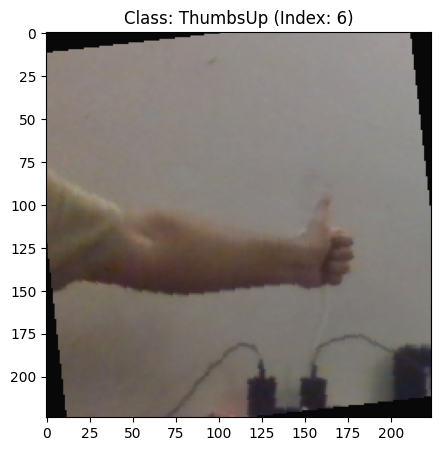

In [20]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os

# --- 1. Define Paths ---
DATA_PATH = "gesture_data"
TRAIN_PATH = os.path.join(DATA_PATH, "train")
VAL_PATH = os.path.join(DATA_PATH, "val")

# --- 2. Define Image Size and Batch Size ---
# Your patch_size is 14. 224 is a good choice as 224 = 14 * 16
IMG_SIZE = 224 
BATCH_SIZE = 32 # You can adjust this based on your GPU memory

# --- 3. Define Transforms ---

# Statistics for normalization (standard for ImageNet)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Training transforms with data augmentation
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomRotation(15),         # Randomly rotate by +/- 15 degrees
    transforms.RandomHorizontalFlip(p=0.5), # Randomly flip horizontally
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),                 # Convert to PyTorch Tensor
    transforms.Normalize(mean=mean, std=std) # Normalize
])

# Validation transforms (no augmentation)
val_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# --- 4. Create Datasets ---
print("Loading datasets...")
train_dataset = datasets.ImageFolder(
    root=TRAIN_PATH,
    transform=train_transforms
)

val_dataset = datasets.ImageFolder(
    root=VAL_PATH,
    transform=val_transforms
)
print("Datasets loaded successfully.")

# --- 5. Create DataLoaders ---
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True, # Shuffle training data
    num_workers=2 # Use 2 background processes to load data
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False, # No need to shuffle validation data
    num_workers=2
)

# --- 6. Save Class Mappings (VERY IMPORTANT) ---
# We need this to map the model's output index (e.g., 4) back to a string (e.g., "Palm")
class_to_idx = train_dataset.class_to_idx
idx_to_class = {v: k for k, v in class_to_idx.items()}
num_classes = len(class_to_idx)

print(f"\nFound {num_classes} classes:")
print(class_to_idx)

# --- 7. (Optional) Sanity Check: View a batch ---
print("\nLoading one batch for sanity check...")
try:
    images, labels = next(iter(train_loader))
    
    print(f"  Image batch shape: {images.shape}")
    print(f"  Label batch shape: {labels.shape}")
    
    # Let's plot one image
    def imshow(inp, title=None):
        """Imshow for Tensor."""
        inp = inp.numpy().transpose((1, 2, 0)) # Convert from (C, H, W) to (H, W, C)
        inp = std * inp + mean                 # De-normalize
        inp = np.clip(inp, 0, 1)               # Clip values to be between 0 and 1
        plt.imshow(inp)
        if title is not None:
            plt.title(title)
        plt.pause(0.001)

    # Get one image from the batch
    first_image = images[0]
    first_label_idx = labels[0].item()
    first_label_class = idx_to_class[first_label_idx]

    print(f"  Displaying one augmented image from the first batch...")
    plt.figure(figsize=(5, 5))
    imshow(first_image, title=f"Class: {first_label_class} (Index: {first_label_idx})")
    plt.show()

except Exception as e:
    print(f"Error during sanity check: {e}")
    print("Please ensure your train/val folders are not empty and paths are correct.")

In [21]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# # --- --- --- --- --- --- --- --- --- ---
# # Part A: The Building Blocks
# # --- --- --- --- --- --- --- --- --- ---

# class PatchEmbedding(nn.Module):
#     """
#     Splits the image into patches and embeds them.
    
#     Parameters:
#     - img_size (int): Size of the input image (e.g., 224).
#     - patch_size (int): Size of each patch (e.g., 14).
#     - in_channels (int): Number of input channels (3 for RGB).
#     - hidden_dim (int): The embedding dimension.
#     """
#     def __init__(self, img_size, patch_size, in_channels, hidden_dim):
#         super().__init__()
#         self.img_size = img_size
#         self.patch_size = patch_size
#         self.n_patches = (img_size // patch_size) ** 2
        
#         # We use a Conv2d as an efficient way to do patch embedding
#         self.patcher = nn.Conv2d(
#             in_channels,
#             hidden_dim,
#             kernel_size=patch_size,
#             stride=patch_size,
#         )
        
#         # [CLS] token: A learnable parameter that will represent the entire image
#         self.cls_token = nn.Parameter(torch.randn(1, 1, hidden_dim))
        
#         # Positional embeddings: Learnable parameters for each patch + CLS token
#         self.pos_embedding = nn.Parameter(
#             torch.randn(1, self.n_patches + 1, hidden_dim)
#         )

#     def forward(self, x):
#         # x shape: [batch_size, in_channels, img_size, img_size]
        
#         # 1. Create patches
#         # x shape: [batch_size, hidden_dim, n_patches_sqrt, n_patches_sqrt]
#         patches = self.patcher(x)
        
#         # 2. Flatten patches
#         # x shape: [batch_size, hidden_dim, n_patches]
#         patches = patches.flatten(2)
        
#         # 3. Permute to: [batch_size, n_patches, hidden_dim]
#         patches = patches.permute(0, 2, 1)
        
#         # 4. Prepend the [CLS] token
#         # Expand CLS token to match the batch size
#         batch_size = patches.shape[0]
#         cls_token = self.cls_token.expand(batch_size, -1, -1)
#         # x shape: [batch_size, n_patches + 1, hidden_dim]
#         x = torch.cat([cls_token, patches], dim=1)
        
#         # 5. Add positional embedding
#         x = x + self.pos_embedding
        
#         return x


# class MultiHeadAttention(nn.Module):
#     """
#     Multi-Head Self-Attention (MHSA) module.
    
#     Parameters:
#     - hidden_dim (int): The embedding dimension (e.g., 160).
#     - num_heads (int): Number of attention heads (e.g., 5).
#     """
#     def __init__(self, hidden_dim, num_heads):
#         super().__init__()
#         self.hidden_dim = hidden_dim
#         self.num_heads = num_heads
        
#         # Dimension of each head
#         self.head_dim = hidden_dim // num_heads
#         if self.head_dim * num_heads != hidden_dim:
#             raise ValueError("hidden_dim must be divisible by num_heads")
            
#         # Linear layers for Q, K, V
#         self.qkv = nn.Linear(hidden_dim, hidden_dim * 3)
#         # Output projection
#         self.proj = nn.Linear(hidden_dim, hidden_dim)
        
#     def forward(self, x):
#         # x shape: [batch_size, n_patches + 1, hidden_dim]
#         B, N, C = x.shape # B=BatchSize, N=NumPatches+1, C=HiddenDim
        
#         # 1. Get Q, K, V
#         # self.qkv(x) shape: [B, N, C * 3]
#         # reshape to: [B, N, 3, num_heads, head_dim]
#         # permute to: [3, B, num_heads, N, head_dim]
#         qkv = self.qkv(x).reshape(
#             B, N, 3, self.num_heads, self.head_dim
#         ).permute(2, 0, 3, 1, 4)
        
#         # q, k, v shapes: [B, num_heads, N, head_dim]
#         q, k, v = qkv[0], qkv[1], qkv[2]
        
#         # 2. Scaled Dot-Product Attention
#         # (q @ k.transpose) shape: [B, num_heads, N, N]
#         attn = (q @ k.transpose(-2, -1)) * (self.head_dim ** -0.5)
#         attn = attn.softmax(dim=-1)
        
#         # (attn @ v) shape: [B, num_heads, N, head_dim]
#         x = (attn @ v)
        
#         # 3. Concat heads
#         # transpose to: [B, N, num_heads, head_dim]
#         # reshape to: [B, N, hidden_dim]
#         x = x.transpose(1, 2).reshape(B, N, C)
        
#         # 4. Output projection
#         x = self.proj(x)
        
#         return x


# class TransformerEncoderBlock(nn.Module):
#     """
#     The main block of the Transformer.
    
#     Parameters:
#     - hidden_dim (int): Embedding dimension (e.g., 160).
#     - num_heads (int): Number of attention heads (e.g., 5).
#     - mlp_ratio (float): Determines the hidden size of the MLP.
#     """
#     def __init__(self, hidden_dim, num_heads, mlp_ratio=4.0):
#         super().__init__()
#         self.norm1 = nn.LayerNorm(hidden_dim)
#         self.attn = MultiHeadAttention(hidden_dim, num_heads)
        
#         self.norm2 = nn.LayerNorm(hidden_dim)
#         mlp_hidden_dim = int(hidden_dim * mlp_ratio)
#         self.mlp = nn.Sequential(
#             nn.Linear(hidden_dim, mlp_hidden_dim),
#             nn.GELU(),
#             nn.Linear(mlp_hidden_dim, hidden_dim),
#         )

#     def forward(self, x):
#         # x shape: [batch_size, n_patches + 1, hidden_dim]
        
#         # 1. Attention block
#         x = x + self.attn(self.norm1(x))
#         # 2. MLP block
#         x = x + self.mlp(self.norm2(x))
        
#         return x

# # --- --- --- --- --- --- --- --- --- ---
# # Part B: The Full ViT Model
# # --- --- --- --- --- --- --- --- --- ---


# class VisionTransformer(nn.Module):
#     """
#     The complete Vision Transformer model.
#     """
#     def __init__(self, img_size, patch_size, in_channels, num_classes, 
#                  hidden_dim, num_heads, num_layers=6):
#         super().__init__()
        
#         # 1. Patch Embedding
#         self.patch_embed = PatchEmbedding(
#             img_size, patch_size, in_channels, hidden_dim
#         )
        
#         # 2. Transformer Encoder Blocks
#         self.encoder_blocks = nn.ModuleList([
#             TransformerEncoderBlock(hidden_dim, num_heads)
#             for _ in range(num_layers)
#         ])
        
#         # 3. Classification Head
#         self.norm = nn.LayerNorm(hidden_dim)
#         self.head = nn.Linear(hidden_dim, num_classes)

#     def forward(self, x):
#         # x shape: [B, C, H, W]
        
#         # 1. Get patch embeddings
#         # x shape: [B, N+1, D]
#         x = self.patch_embed(x)
        
#         # 2. Pass through Transformer Encoder
#         for block in self.encoder_blocks:
#             x = block(x)
            
#         # 3. Get the [CLS] token output
#         # x shape: [B, D]
#         cls_token_out = self.norm(x[:, 0])
        
#         # 4. Pass through classification head
#         # output shape: [B, num_classes]
#         output = self.head(cls_token_out)
        
#         return output

# # --- --- --- --- --- --- --- --- --- ---
# # Part C: Instantiation & Sanity Check
# # --- --- --- --- --- --- --- --- --- ---

# # --- YOUR ASSIGNMENT PARAMETERS ---
# ROLL_NUM_SEED = 91
# HIDDEN_DIM = 128 + (ROLL_NUM_SEED % 5) * 32  # 160
# NUM_HEADS = 4 + (ROLL_NUM_SEED % 3)         # 5
# PATCH_SIZE = 8 + (ROLL_NUM_SEED % 4) * 2    # 14
# NUM_EPOCHS = 10 + (ROLL_NUM_SEED % 5)       # 11

# # --- FROM PREVIOUS STEPS ---
# IMG_SIZE = 224 # From Step 4
# IN_CHANNELS = 3 # RGB
# NUM_CLASSES = num_classes # From Step 4 (should be 7)
# NUM_LAYERS = 6 # A good default, you can tune this (e.g., 4, 6, 8)

# # --- Set device ---
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# # --- 1. Instantiate the model ---
# print("Instantiating VisionTransformer...")
# model = VisionTransformer(
#     img_size=IMG_SIZE,
#     patch_size=PATCH_SIZE,
#     in_channels=IN_CHANNELS,
#     num_classes=NUM_CLASSES,
#     hidden_dim=HIDDEN_DIM,
#     num_heads=NUM_HEADS,
#     num_layers=NUM_LAYERS
# ).to(device)

# print("Model created successfully!")

# # --- 2. Sanity Check ---
# # Create a random batch of images and pass it through the model
# try:
#     print("Running sanity check...")
#     # Get one batch from the train_loader
#     images, labels = next(iter(train_loader))
#     images = images.to(device)
    
#     print(f"  Input batch shape: {images.shape}")
    
#     # Pass through the model
#     output = model(images)
    
#     print(f"  Output batch shape: {output.shape}")
    
#     # Check if the output shape is correct
#     assert output.shape == (images.shape[0], NUM_CLASSES)
#     print("  Sanity check PASSED! Output shape is correct.")
    
# except Exception as e:
#     print(f"\n--- SANITY CHECK FAILED ---")
#     print(f"Error: {e}")
#     print("Please check your model implementation.")

Using device: cpu
Instantiating VisionTransformer...
Model created successfully!
Running sanity check...
  Input batch shape: torch.Size([32, 3, 224, 224])
  Output batch shape: torch.Size([32, 7])
  Sanity check PASSED! Output shape is correct.


Plotting training history...


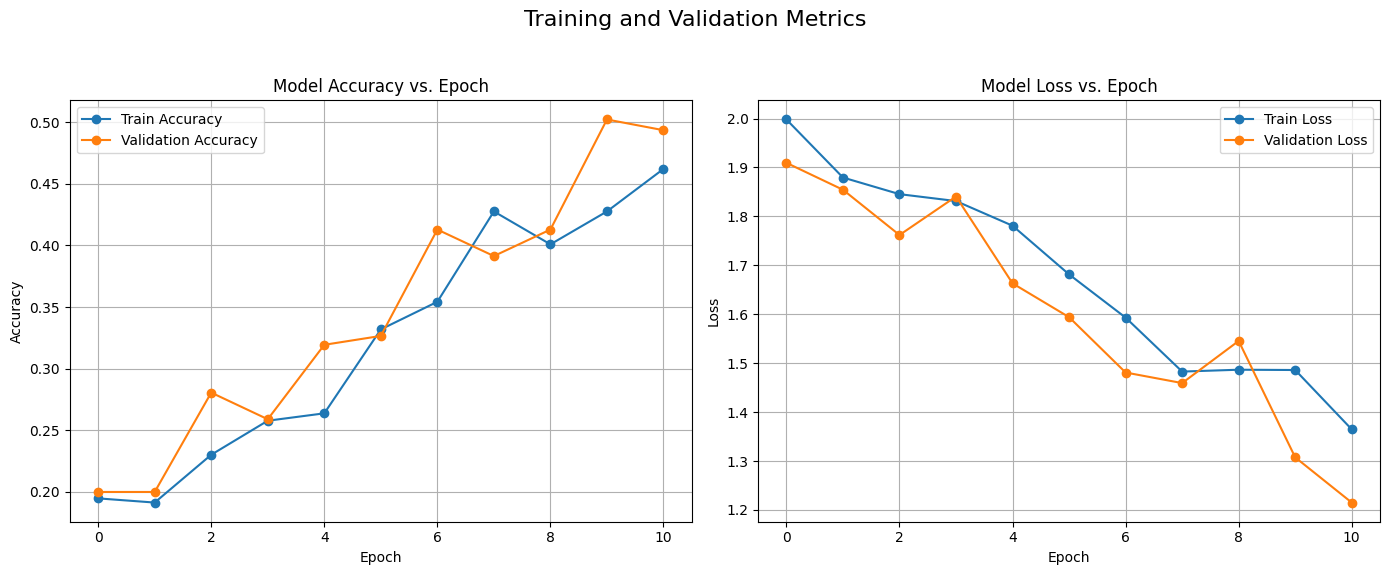


Generating Confusion Matrix...
Using device: cpu
Class mappings loaded: {0: 'Fist', 1: 'None', 2: 'Palm', 3: 'Peace', 4: 'RockOn', 5: 'ThumbsDown', 6: 'ThumbsUp'}
Successfully loaded model weights from vit_gesture_model.pth


Validating: 100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:30<00:00,  3.05s/it]


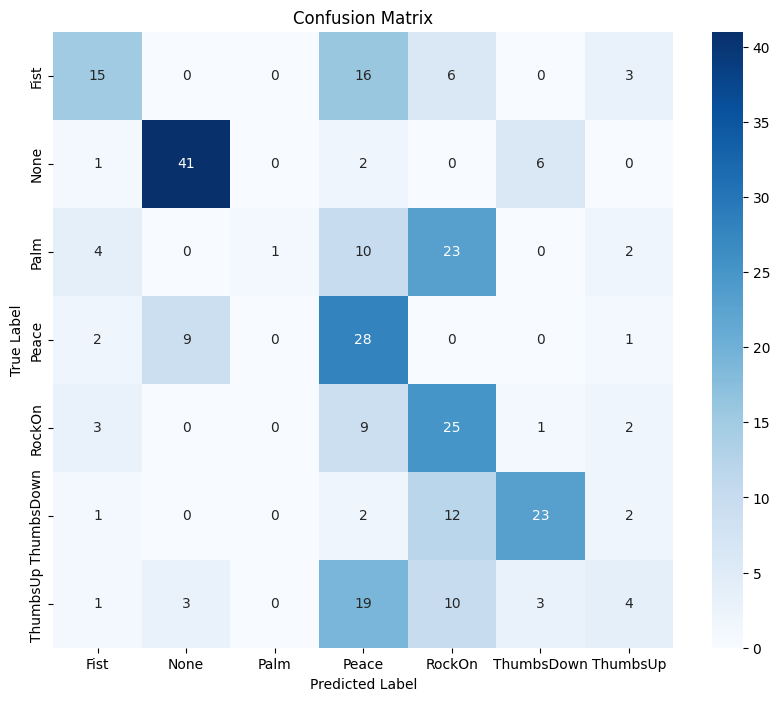


--- Analysis Complete ---


In [22]:
# import torch
# import torch.nn as nn
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sn
# import pandas as pd
# from sklearn.metrics import confusion_matrix
# from tqdm import tqdm
# import os # Make sure os is imported

# # --- --- --- --- --- --- --- --- --- ---
# # Part 1: Plot Training Graphs
# # --- --- --- --- --- --- --- --- --- ---

# # !!! IMPORTANT !!!
# # PASTE YOUR 'history' DATA FROM YOUR CONSOLE LOG HERE.
# # I've formatted the dictionary based on the log you provided.
# history = {
#  'train_loss': [1.9980, 1.8794, 1.8454, 1.8313, 1.7809, 1.6814, 1.5931, 1.4828, 1.4866, 1.4860, 1.3647],
#  'train_acc': [0.1948, 0.1914, 0.2302, 0.2578, 0.2638, 0.3319, 0.3543, 0.4276, 0.4009, 0.4276, 0.4621],
#  'val_loss': [1.9094, 1.8544, 1.7619, 1.8406, 1.6631, 1.5940, 1.4809, 1.4593, 1.5454, 1.3075, 1.2151],
#  'val_acc': [0.2000, 0.2000, 0.2806, 0.2590, 0.3194, 0.3266, 0.4129, 0.3914, 0.4129, 0.5022, 0.4935] # Corrected the 20.2 -> 0.2
# }
# # --- --- ---

# print("Plotting training history...")
# plt.figure(figsize=(14, 6))

# # Plot Accuracy
# plt.subplot(1, 2, 1)
# plt.plot(history['train_acc'], label='Train Accuracy', marker='o')
# plt.plot(history['val_acc'], label='Validation Accuracy', marker='o')
# plt.title('Model Accuracy vs. Epoch')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)

# # Plot Loss
# plt.subplot(1, 2, 2)
# plt.plot(history['train_loss'], label='Train Loss', marker='o')
# plt.plot(history['val_loss'], label='Validation Loss', marker='o')
# plt.title('Model Loss vs. Epoch')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)

# plt.suptitle('Training and Validation Metrics', fontsize=16)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()


# # --- --- --- --- --- --- --- --- --- ---
# # Part 2: Generate Confusion Matrix
# # --- --- --- --- --- --- --- --- --- ---
# print("\nGenerating Confusion Matrix...")

# # --- A: Make sure all variables are loaded ---
# # Please RE-RUN your Dataloader cell (Step 4) and Model cell (Step 5) 
# # in your local notebook *before* this step. This is to ensure 
# # 'val_loader', 'model' (the structure), 'device', and 'idx_to_class' 
# # are all defined in your local notebook's memory.

# try:
#     # --- Re-define key variables just in case ---
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
#     # Load Dataloader (re-run Step 4)
#     # val_loader = ... 
    
#     # Load Model Structure (re-run Step 5)
#     # model = VisionTransformer(...) 
    
#     # Load Class Mappings (from Step 4)
#     # idx_to_class = {0: 'Fist', 1: 'None', ...} 
    
#     print(f"Using device: {device}")
#     print(f"Class mappings loaded: {idx_to_class}")

# except NameError:
#     print("\n--- ERROR ---")
#     print("One or more key variables ('val_loader', 'model', 'idx_to_class') are not defined.")
#     print("Please go back and RE-RUN your Step 4 (Dataloader) and Step 5 (Model Build) cells.")
#     print("Then, re-run this cell.")
#     # Stop here if variables are missing
#     exit()


# # --- B: Load the trained model weights ---
# MODEL_SAVE_PATH = "vit_gesture_model.pth"

# if os.path.exists(MODEL_SAVE_PATH):
#     # Load the weights into the model structure
#     model.load_state_dict(torch.load(MODEL_SAVE_PATH, map_location=device))
#     model.to(device)
#     model.eval() # Set to evaluation mode
#     print(f"Successfully loaded model weights from {MODEL_SAVE_PATH}")
# else:
#     print(f"--- ERROR ---")
#     print(f"Model file not found at {MODEL_SAVE_PATH}")
#     print("Please ensure 'vit_gesture_model.pth' is in the same directory as your notebook.")
#     # Stop here if the model file is missing
#     exit()

# # --- C: Get all predictions on the validation set ---
# all_preds = []
# all_labels = []

# with torch.no_grad():
#     for inputs, labels in tqdm(val_loader, desc="Validating"):
#         inputs, labels = inputs.to(device), labels.to(device)
        
#         outputs = model(inputs)
#         _, preds = torch.max(outputs, 1)
        
#         all_preds.extend(preds.cpu().numpy())
#         all_labels.extend(labels.cpu().numpy())

# # --- D: Plot the Confusion Matrix ---
# class_names = list(idx_to_class.values())

# cm = confusion_matrix(all_labels, all_preds)
# df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)

# plt.figure(figsize=(10, 8))
# sn.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

# print("\n--- Analysis Complete ---")

In [26]:
import cv2
import torch
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import numpy as np

# --- 1. Ensure Model Structure and Mappings are Loaded ---
# This step is critical. We need the 'model' variable (the untrained structure)
# and 'idx_to_class' to be in memory.
# If you get a 'NameError', re-run your Step 4 and Step 5 cells.
try:
    model.eval() # We've already loaded the weights in Step 7
    idx_to_class
    device
except NameError:
    print("--- ERROR ---")
    print("Variables 'model' or 'idx_to_class' not defined.")
    print("Please RE-RUN your Step 4 (Dataloader) and Step 5 (Model Build) cells first.")
    # Stop here
    exit()

print("Model and class mappings are loaded.")
print(f"Using device: {device}")
print(f"Classes: {idx_to_class}")

# --- 2. Define the *exact* same transforms as your Validation set ---
# (from Step 4)
IMG_SIZE = 224
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# We need a transform to convert the OpenCV frame (numpy array) to a tensor
live_transforms = transforms.Compose([
    transforms.ToPILImage(), # Convert numpy array to PIL Image
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# --- 3. Define the Region of Interest (ROI) ---
# Use the *same* box as your data collection
ROI_RECT = (100, 300, 400, 600) # y1, x1, y2, x2

# --- 4. Start the Webcam Live Feed ---
print("\n--- Starting Live Demo ---")
print("Press 'q' in the popup window to quit.")

cap = cv2.VideoCapture(0) # 0 is usually the default webcam
if not cap.isOpened():
    print("Error: Could not open webcam.")
    # Stop here
    exit()

while True:
    # Read a frame
    ret, frame = cap.read()
    if not ret:
        print("Error: Can't receive frame. Exiting...")
        break
        
    # Flip the frame horizontally (mirror view)
    frame = cv2.flip(frame, 1)
    
    # --- 5. Preprocess the ROI for the model ---
    y1, x1, y2, x2 = ROI_RECT
    
    # Extract the ROI from the frame
    roi = frame[y1:y2, x1:x2]
    
    # Convert the ROI from BGR (OpenCV) to RGB (PIL/PyTorch)
    roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    
    # Apply the transforms
    input_tensor = live_transforms(roi_rgb)
    
    # Add a batch dimension (model expects [B, C, H, W])
    # and send to the device
    input_batch = input_tensor.unsqueeze(0).to(device)

    # --- 6. Get Model Prediction ---
    with torch.no_grad():
        output = model(input_batch)
        
        # Apply Softmax to get probabilities (confidence scores)
        probabilities = F.softmax(output, dim=1)
        
        # Get the top probability and its class index
        confidence, predicted_idx = torch.max(probabilities, 1)
        
        # Get the class name
        predicted_class = idx_to_class[predicted_idx.item()]
        confidence_score = confidence.item() * 100

    # --- 7. Display the Prediction on the Frame ---
    
    # Draw the ROI box
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Create the text to display
    if confidence_score > 40: # You can adjust this threshold
        label = f"{predicted_class}: {confidence_score:.2f}%"
        color = (0, 255, 0) # Green for confident
    else:
        label = "Detecting..."
        color = (0, 0, 255) # Red for uncertain
        
    # Put text on the frame
    cv2.putText(frame, label, (x1, y1 - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    
    # Display the frame
    cv2.imshow('Live Gesture Classification - Press "q" to quit', frame)
    
    # Wait for 'q' key to be pressed
    if cv2.waitKey(1) == ord('q'):
        break

# --- 8. Cleanup ---
print("\n--- Demo Finished ---")
cap.release()
cv2.destroyAllWindows()

Model and class mappings are loaded.
Using device: cpu
Classes: {0: 'Fist', 1: 'None', 2: 'Palm', 3: 'Peace', 4: 'RockOn', 5: 'ThumbsDown', 6: 'ThumbsUp'}

--- Starting Live Demo ---
Press 'q' in the popup window to quit.

--- Demo Finished ---
